<a href="https://colab.research.google.com/github/DanielHevdeli/hafifot-tiug/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/DanielHevdeli/hafifot-tiug.git

Cloning into 'hafifot-tiug'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 6), reused 13 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 7.19 MiB | 11.70 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizer, AutoTokenizer

In [4]:
df = pd.read_csv('hafifot-tiug/posts.csv')
df.head()

,question_id,length,date,text
0,100003,1276,2015-12-09 18:08,"אני וחבר שלי ביחד כבר 5 חודשים וסה""כ היחסים טו..."
1,100005,885,2015-12-09 18:46,היי לכולם ...
2,100008,1202,2015-12-09 16:46,"היי, אז מאיפה להתחיל? \nהיום קבעתי עם חברה לל..."
3,100009,1518,2015-12-08 23:23,שלום וחג שמח! \n \nחבר שלי ואני כבר שנתיים וחצ...
4,100011,904,2015-12-09 19:45,שלום אנשים ................. \n:( \n \nשמעו .....


In [5]:
print(f'Number of posts: {len(df)}')

Number of posts: 10000


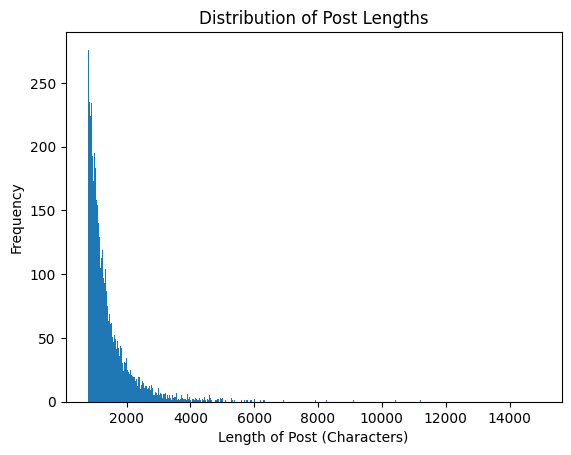

In [9]:
plt.hist(df['length'], bins=1000)
plt.xlabel('Length of Post (Characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Post Lengths')
plt.show()

We can see that the majority of the posts are 800-3000 in length

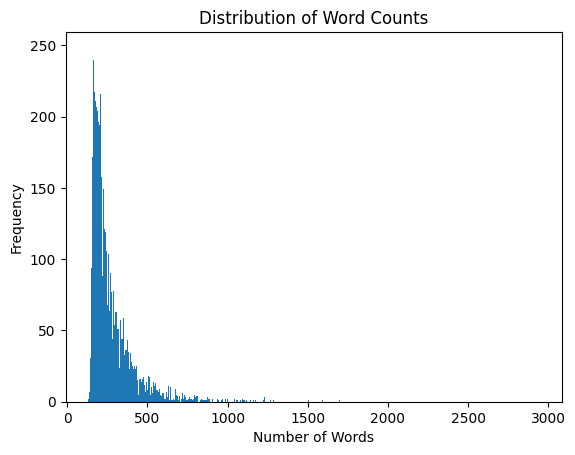

In [11]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

plt.hist(df['word_count'], bins=1000)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts')
plt.show()

We can see that the distributions of chars and words among each one's scale are very similar (historgrams shape are very similar). Here, most of the posts contain 200-600 words

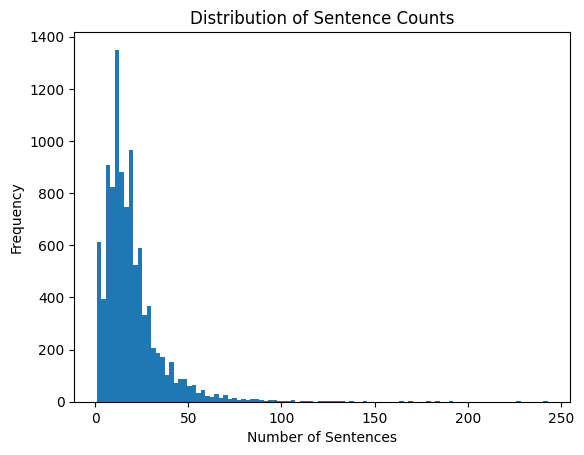

In [14]:
df['sentence_count'] = df['text'].apply(lambda x: len(str(x).split('.')))

plt.hist(df['sentence_count'], bins=100)
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Counts')
plt.show()

Most of the posts contains less than 50 sentences.

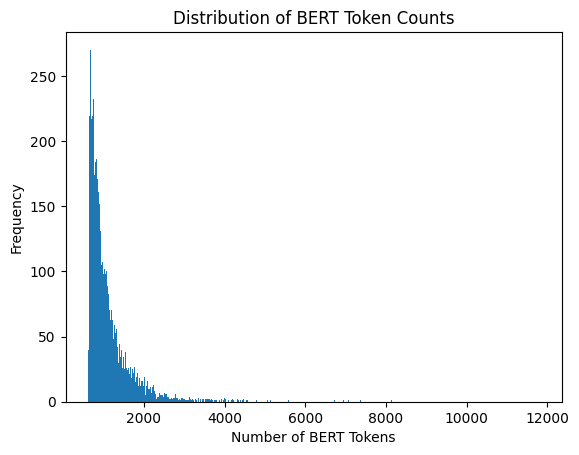

In [16]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def count_bert_tokens(text):
    if pd.isna(text):
        return 0
    tokens = tokenizer.tokenize(str(text))
    return len(tokens)

df['bert_token_count'] = df['text'].apply(count_bert_tokens)

plt.hist(df['bert_token_count'], bins=1000)
plt.xlabel('Number of BERT Tokens')
plt.ylabel('Frequency')
plt.title('Distribution of BERT Token Counts')
plt.show()

The distribution is almost identical to the char-level distribution, what implies that maybe the tokenizer didnt trained on a lot of hebrew text, what makes him a char-level tokenizer for hebrew. Lets check it!

In [17]:
arb_text = df['text'][0]
print("--------- Text ---------")
print(arb_text)
print("--------- Tokens ---------")
print(tokenizer.tokenize(arb_text))

--------- Text ---------
אני וחבר שלי ביחד כבר 5 חודשים וסה"כ היחסים טובים ויש לנו המון במשותף, הוא עדיין לא אמר לי שהוא אוהב אותי ולא פגשנו את המשפחה אחד של השניה. שנינו הגענו לקשר אחרי מערכת יחסים ארוכה מאוד. 
רציתי לעלות את הנושא אז הזמנתי אותו למפגש משפחתי שלי, הוא הסכים אבל לא הציע מפגש עם המשפחה שלו. כמה שעות אח"כ החלטתי לעלות את הנושא באופן ישיר יותר ולשאול אותו ישירות למה הוא לא מציג אותי להורים. התשובה שלו הייתה שזה מרגיש לו מוקדם מדיי, שזה יכול ליצור מצב של הקשרות משני הצדדים והוא צריך יותר זמן ובטחון בקשר בשביל זה ושכרגע מה שחסר לו בקשר שלנו הוא יותר זמן ביתי ביחד (יום לפני זה הוא כעס שאני אף פעם לא מבלה את יום שישי במלואו איתו). אחרי שהמשכנו לחפור בנושא הוא אמר שהסיבה לחוסר הבטחון בקשר קשורה למאפיינים פיזים שלי שהוא לא נמשך אליהם "לפעמים אני מאוד אוהב אותך ונמשך אלייך, ולפעמים פחות במובן הפיזי". אני כמובן נעלבתי אבל מצד שני גם הכלתי, המשכנו את השיחה ודיברנו על עוד המון דברים והוא נפתח בפני עם המון דברים נפשיים, בהמשך השיחה אמרתי לו שאני אוהבת אותו (לראשונה) והוא ענה שגם הוא

We were right! So lets use a hebrew tokenizer

Token indices sequence length is longer than the specified maximum sequence length for this model (591 > 512). Running this sequence through the model will result in indexing errors


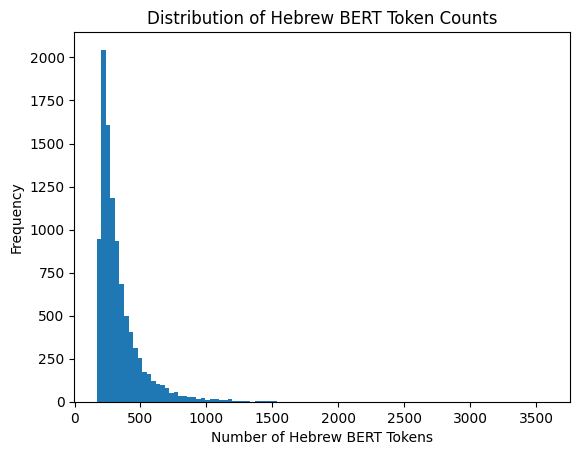

In [19]:
hebrew_tokenizer = AutoTokenizer.from_pretrained('onlplab/alephbert-base')

def count_hebrew_bert_tokens(text):
    if pd.isna(text):
        return 0
    return len(hebrew_tokenizer.encode(str(text), add_special_tokens=True))

df['hebrew_bert_token_count'] = df['text'].apply(count_hebrew_bert_tokens)

plt.hist(df['hebrew_bert_token_count'], bins=100)
plt.xlabel('Number of Hebrew BERT Tokens')
plt.ylabel('Frequency')
plt.title('Distribution of Hebrew BERT Token Counts')
plt.show()

This is much better and actually very similar to the words distribution. Lets check a few posts

In [21]:
def print_post_info(post_num):
    print('--------- Text ---------')
    print(df['text'][post_num])
    print('--------- Tokens (AlephBERT) ---------')
    print(hebrew_tokenizer.tokenize(df['text'][post_num]))
    print('--------------------------------------')
    print(f'Num of words: {df['word_count'][post_num]}')
    print(f'Num of AlephBERT tokens: {df['hebrew_bert_token_count'][post_num]}')

In [ ]:
print_post_info(0)

--------- Text ---------
אז כן יש לי שני מצבים, כשאני בבית עם המשפחה שלי אני פחות בסטלה מהחיים ואני הילדה הגאונה שתמיד הייתי, וכשאני עם חברים וצוחקת מהכל וכמעט תמיד בסטלה מהחיים וממש קשה לתפוס אותי רצינית במצבים שקורים בחוץ.  
כשהייתי קטנה יותר הייתי הילדה הכי מצטיינת בשכבה אבל בשנתיים שלוש האחרונות הפסקתי ללמוד והוצאתי מלא נכשלים ועכשיו אני בכיתה י מבר, וכשאני עם חברים אני תמיד אוהבת לשים את הבעיות בצד ולהתעלם מרוב הדברים שקורים כי אני רק רוצה פשוט להנות ולצחוק. 
אם יש מבחנים או אירועים אני כמעט תמיד שוכחת מהם וחברות שלי חושבות שאני סתומה בגלל זה. מה שהן לא מבינות זה שלא אכפת לי מתי יש מבחן כי אני יודעת שתוך שנייה של הכנה למבחן אני מוציאה מעל 90. הסיבה היחידה שהלכתי למבר זה בגלל שאני צריכה פחות לחץ ובגלל שהממוצע שלי בסוף כיתה ט התאים רק לכיתת מבר. 
חברים אחרים שלי מהשכבה צוחקים עליי שאני במבר, וזה גם לא מעניין אותי ממש כי זה היה צפוי. 
כל הזמן כשיש מצבים שצריך להילחץ וכולם לחוצים ושמים לב שאני לא לחוצה, גם חושבים שאני סתומה ואטומה. אני פשוט לא רואה סיבה להילחץ, בעיקר בגלל שאם נלחצים א

In [22]:
print_post_info(10)

--------- Text ---------
היי, 
אני עוד מעט בת 16 בכיתה י 
אני ממש דלוקה על מישהו מהבית ספר שלי (בכיתה יא) כבר כמה שבועות. ראיתי אותו פעם ראשונה בבית ספר שנה שעברה ותמיד חשבתי שהוא נראה טוב אבל רק לפני כמה שבועות התחלתי ממש לשים אליו לב. הוא ממש "מקובל" וחלק אמרו לי שהוא חרא, וחלק אמרו לי שהוא ממש סבבה... לא נעים לי להגיד אבל גם אני נראית ממש טוב, גם בגוף וגם בפנים, לפי מה שאומרים לי והאמת שיש לי די ביטחון עם המראה החיצוני שלי. הבעיה היא הפנימי, אני סובלת מחרדות כבר תקופה, ובגלל זה אני נמנעת מלצאת למסיבות או אפילו סתם עם חברות... אנחנו כל הזמן מסתכלים אחד על השני, אני רואה אותו כמעט כל הפסקה ותמיד יש לנו קשר עין, וגם חברות שלי כל הזמן אומרות לי שהוא כל הזמן מסתכל עליי אבל אף אחד לא ניגש.. אני ממש רוצה שיקרה משהו, אבל מפחדת שאם יקרה משהו פתאום אני אשתפן ולא ארצה. אפילו לא התנשקתי עדיין. היו לי כמה הזדמנויות אבל אני מאוד בררנית ולא באמת רציתי אף אחד שרצה אותי, אני ממש רגישה ומפחדת להיפגע... קשה לי לקחת צעדים גדולים בכל מה שנוגע לתחום הזה וזה ממש מבאס אותי. יש לי הרבה בעיות בקטע הזה ואני ל

In [23]:
df[['length', 'word_count', 'sentence_count', 'bert_token_count', 'hebrew_bert_token_count']].describe()

,length,word_count,sentence_count,bert_token_count,hebrew_bert_token_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1415.055600,274.827100,19.233000,1126.463400,338.892900
std,746.332224,145.044581,15.653275,594.978347,179.324381
min,800.000000,131.000000,1.000000,619.000000,170.000000
25%,957.000000,186.000000,10.000000,761.000000,230.000000
50%,1175.000000,229.000000,16.000000,935.000000,282.000000
75%,1597.000000,310.000000,24.000000,1269.000000,381.000000
max,14926.000000,2943.000000,243.000000,11795.000000,3590.000000


In [30]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   question_id              10000 non-null  int64         
 1   length                   10000 non-null  int64         
 2   date                     10000 non-null  datetime64[ns]
 3   text                     10000 non-null  object        
 4   word_count               10000 non-null  int64         
 5   sentence_count           10000 non-null  int64         
 6   bert_token_count         10000 non-null  int64         
 7   hebrew_bert_token_count  10000 non-null  int64         
 8   year                     10000 non-null  int32         
 9   month                    10000 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(6), object(1)
memory usage: 703.3+ KB


In [58]:
df['year'] = df['date'].dt.year
print(df['year'].value_counts().sort_index())

year
2015     703
2016    9297
Name: count, dtype: int64


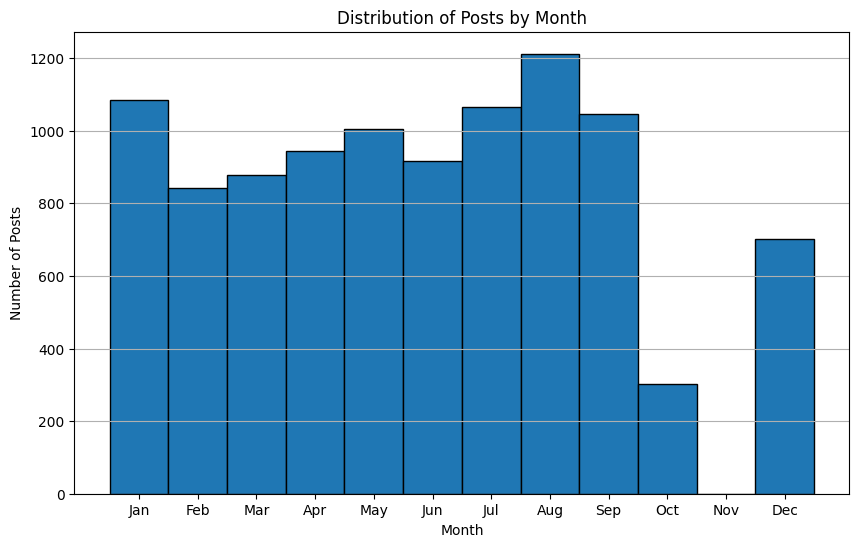

In [59]:
df['month'] = df['date'].dt.month

plt.figure(figsize=(10, 6))
plt.hist(df['month'], bins=range(1, 14), align='left', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('Distribution of Posts by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()

In [57]:
posts_per_month_year = df.groupby(['year', 'month']).size().unstack(fill_value=0)
print(posts_per_month_year)

month    1    2    3    4     5    6     7     8     9    10   12
year                                                             
2015      0    0    0    0     0    0     0     0     0    0  703
2016   1084  841  879  944  1005  917  1065  1212  1047  303    0


In [40]:
earliest_date = df['date'].min()
latest_date = df['date'].max()

print(f"Earliest post date: {earliest_date}")
print(f"Latest post date: {latest_date}")

Earliest post date: 2015-12-08 23:23:00
Latest post date: 2016-10-08 18:41:00
